![Rhyme](https://rhyme.com/assets/img/logo-dark.png)

# Task 1: Introduction

Welcome to Basic Image Classification with TensorFlow.

This graph describes the problem that we are trying to solve visually. We want to create and train a model that takes an image of a hand written digit as input and predicts the class of that digit, that is, it predicts the digit or it predicts the class of the input image.

![Hand Written Digits Classification](images/1_1.png)

### Import TensorFlow

In [33]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline    
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.2.0-rc3


**Note** - 

1. %matplotlib inline - to ensure that images are displayed within the notebook

# Task 2: The Dataset
### Load MNIST

The **MNIST** database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

In [0]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

### Shapes of Imported Arrays

In [6]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


**Note** - 

1. X_train shape: (60000, 28, 28)  ->  There are 60000 image examples. Each example has 28 rows and 28 columns, i.e., 28 by 28 are the pixels. 

### Plot an Image Example

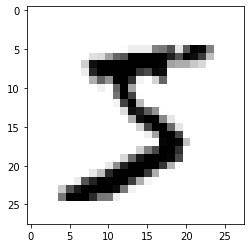

In [8]:
# cmap - to give colour to our image 
# binary - to display black and white colour
plt.imshow(X_train[0], cmap='binary')
plt.show()

### Display Labels

In [9]:
Y_train[0]

5

In [10]:
print(set(Y_train))   # it will give me all unique values in Y_train set 

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


# Task 3: One Hot Encoding
After this encoding, every label will be converted to a list with 10 elements and the element at index to the corresponding class will be set to 1, rest will be set to 0:

| original label | one-hot encoded label |
|------|------|
| 5 | [0, 0, 0, 0, 0, 1, 0, 0, 0, 0] |
| 7 | [0, 0, 0, 0, 0, 0, 0, 1, 0, 0] |
| 1 | [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] |

### Encoding Labels

In [0]:
Y_train_encoded = to_categorical(Y_train)
Y_test_encoded = to_categorical(Y_test)

**Note** - 

It would be difficult for model to predict value from 0-9. After encoding, model has to choose class. 

### Validated Shapes

In [19]:
print("Y_train_encoded shape:", Y_train_encoded.shape)
print("Y_test_encoded shape:", Y_test_encoded.shape)

Y_train_encoded shape: (60000, 10)
Y_test_encoded shape: (10000, 10)


### Display Encoded Labels

In [20]:
Y_train_encoded[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Task 4: Neural Networks

### Linear Equations

![Single Neuron](images/1_2.png)

The above graph simply represents the equation:

\begin{equation}
y = w1 * x1 + w2 * x2 + w3 * x3 + b
\end{equation}

Where the `w1, w2, w3` are called the **weights** and `b` is an intercept term called **bias**. The equation can also be *vectorised* like this:

\begin{equation}
y = W . X + b
\end{equation}

Where `X = [x1, x2, x3]` and `W = [w1, w2, w3].T`. The .T means *transpose*. This is because we want the dot product to give us the result we want i.e. `w1 * x1 + w2 * x2 + w3 * x3`. This gives us the vectorised version of our linear equation.

A simple, linear approach to solving hand-written image classification problem - could it work?

![Single Neuron with 784 features](images/1_3.png)

### Neural Networks

![Neural Network with 2 hidden layers](images/1_4.png)

This model is much more likely to solve the problem as it can learn more complex function mapping for the inputs and outputs in our dataset.

* We can easily find value of W and b by using algebra(in case of data which is not image). 

* The problem here is that the data which we have is observed. So, due to the nature of observation, we will not be able to find definative value of W and b. 

* One additional thing that we do in node is that we apply activation as well(in addition to linear output). 

* Purpose of activation function - to help the neural network to find non-linear patterns in data. And helps models to learn non-linear patterns at different points in the computational graph. 

* We have few hidden outputs(in hidden layer) which are weighted of our input features pass through an activation function.

* In our code; 784 node for input layer, we will have 128 hidden layers and 10 node for output layer.

# Task 5: Preprocessing the Examples

### Unrolling N-dimensional Arrays to Vectors

In [24]:
# converting 28*28 input input into 784 input list
# (6000, 784) - desired shape

X_train_reshaped = np.reshape(X_train, (60000, 784))
X_test_reshaped = np.reshape(X_test, (10000, 784))

print("X_train_reshaped shape:", X_train_reshaped.shape)
print("X_test_reshaped shape:", X_test_reshaped.shape)

X_train_reshaped shape: (60000, 784)
X_test_reshaped shape: (10000, 784)


### Display Pixel Values

In [27]:
print(set(X_train_reshaped[0]))  # it will give all unique values 

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


### Data Normalization

For model to learn W and b for different layers, the computations will be much more effective and fast if we normalize the data. 

In [0]:
X_mean = np.mean(X_train_reshaped)
X_std = np.std(X_train_reshaped)

# defining a very small constant value
epsilion = 1e-10

# very small value of std will lead to unstability in computation and adding another small value can solve this problem(if exists)
X_train_norm = (X_train_reshaped-X_mean)/(X_std+epsilion)
# because we wanna do same pre-processing on test as which we have done on trainnig set.
X_test_norm = (X_test_reshaped-X_mean)/(X_std+epsilion)

### Display Normalized Pixel Values

In [31]:
print(set(X_train_norm[0]))

{-0.38589016215482896, 1.306921966983251, 1.17964285952926, 1.803310486053816, 1.6887592893452241, 2.8215433456857437, 2.719720059722551, 1.1923707702746593, 1.7396709323268205, 2.057868700961798, 2.3633385588513764, 2.096052433197995, 1.7651267538176187, 2.7960875241949457, 2.7451758812133495, 2.45243393406917, 0.02140298169794222, -0.22042732246464067, 1.2305545025108566, 0.2759611966059242, 2.210603629906587, 2.6560805059955555, 2.6051688630139593, -0.4240738943910262, 0.4668798577869107, 0.1486820891519332, 0.3905123933145161, 1.0905474843114664, -0.09314821501064967, 1.4851127174188385, 2.7579037919587486, 1.5360243604004349, 0.07231462467953861, -0.13133194724684696, 1.294194056237852, 0.03413089244334132, 1.3451056992194483, 2.274243183633583, -0.24588314395543887, 0.772349715676489, 0.75962180493109, 0.7214380726948927, 0.1995937321335296, -0.41134598364562713, 0.5687031437501034, 0.5941589652409017, 0.9378125553666773, 0.9505404661120763, 0.6068868759863008, 0.4159682148053143

# Task 6: Creating a Model
### Creating the Model

In [0]:
# no need to define input layer in Sequential layer. input_shape() will automatically define input layer 
model = Sequential([
                    Dense(128, activation='relu', input_shape=(784,)),
                    Dense(128, activation='relu'),
                    Dense(10, activation='softmax')    # output layer 
])

### Activation Functions

The first step in the node is the linear sum of the inputs:
\begin{equation}
Z = W . X + b
\end{equation}

The second step in the node is the activation function output:

\begin{equation}
A = f(Z)
\end{equation}

Graphical representation of a node where the two operations are performed:

![ReLU](images/1_5.png)



There are various types of activation function - 

1. relu - This is a linear function for all the positive values and is simplicit to zero for all negative values.

2. softmax - This function gives us the probability scores for various nodes. And these probability scores sum up to 1. And the class[0,1,2,3,4,5,6,7,8,9] with the heighest probability gives us the prediction.

### Compiling the Model

In [36]:
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# to display architecture of the model 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


1. sgd - Stochastic gradient descent -  is an iterative method for optimizing an objective function.
2. categorical_crossentropy - It gives the value based on the actual Y and predicted Y value. And this loss should be minimum, to get more and more accurate model.

# Task 7: Training the Model

### Training the Model

Epoch is like the iteration. 

In [39]:
# we will go through these examples 3 times 
model.fit(X_train_norm, Y_train_encoded, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1384 - accuracy: 0.9593
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1121 - accuracy: 0.9677
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0942 - accuracy: 0.9728


### Evaluating the Model

In [40]:
loss, accuracy = model.evaluate(X_test_norm, Y_test_encoded)
print(accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.1024 - accuracy: 0.9671
0.9671000242233276


**Note** - 

If accuracy(Evaluating the model)<<accuracy(Training the model) that means model has just learnt the training examples.

# Task 8: Predictions

### Predictions on Test Set

In [47]:
predictions = model.predict(X_test_norm)
print("Shape of predictions:", predictions.shape)
print("prediction[0]:", predictions[0])

Shape of predictions: (10000, 10)
prediction[0]: [1.78583850e-05 5.00513693e-07 6.81145699e-04 4.07550903e-03
 5.54946418e-08 1.21305575e-05 1.66547520e-09 9.95133221e-01
 7.73228658e-06 7.18707379e-05]


### Plotting the Results

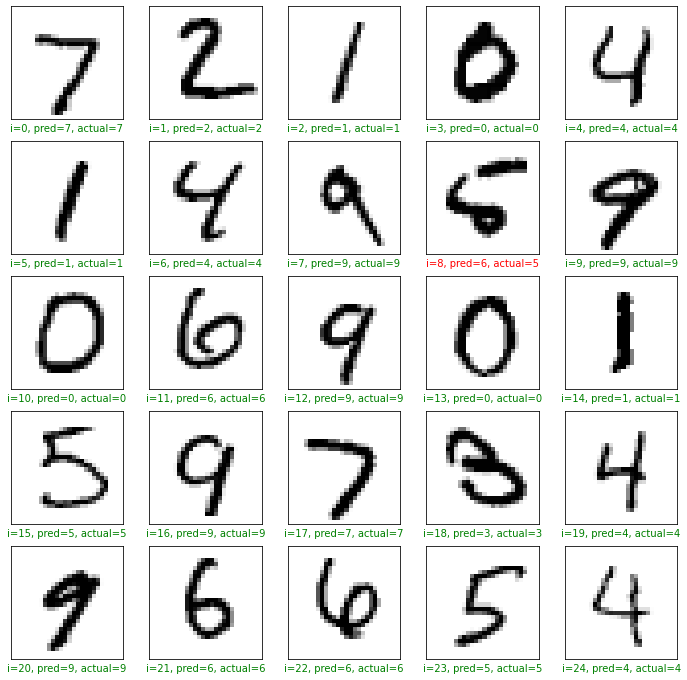

In [46]:
plt.figure(figsize=(12,12))

start_index = 0

# 25 - There are total 10000 examples in our test set. And we can not take all at a time. So, We are taking few examples at a time,i.e., 25
for i in range(25):    
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  # each prediction is going to be a list of 10 softmax outputs.
  pred = np.argmax(predictions[start_index+i])   
  actual = Y_test[start_index+i]                     

  col = 'g'    # green color 
  if pred!=actual:
    col = 'r'
  
  plt.xlabel('i={}, pred={}, actual={}'.format(start_index+i, pred, actual), color=col)
  plt.imshow(X_test[start_index+i], cmap='binary')
plt.show()

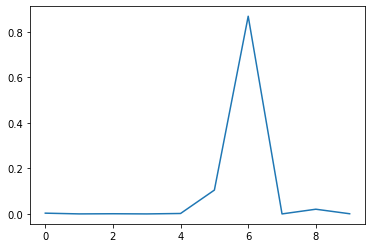

In [45]:
plt.plot(predictions[8])
plt.show()

* These are the softmax probability outputs. 